In [26]:
from puzzle_utils import extract_digit,find_puzzle,four_point_transform,order_points

In [27]:
import copy
import keras
import numpy as np
from model import get_model
# from scripts.data_preprocess import get_data
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import img_to_array
from data_preprocess import get_data


## Load the data

In [28]:
x_train, x_test, y_train, y_test = get_data('sudoku-2-1.csv')

In [30]:
model = keras.models.load_model('sudoku_model.h5')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization (Batch  (None, 9, 9, 64)          256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_1 (Bat  (None, 9, 9, 64)          256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         8320      
                                                                 
 flatten (Flatten)           (None, 10368)             0

## Solve Sudoku by filling blank positions one by one

In [32]:
def norm(a):
    
    return (a/9)-.5

In [33]:
def denorm(a):
    
    return (a+.5)*9

In [34]:
def inference_sudoku(board):
    """
    Solves the Sudoku puzzle given a 9x9 board representation.

    Args:
        board (np.ndarray): The Sudoku grid with empty cells represented by 0s (shape: (9, 9)).

    Returns:
        np.ndarray: The solved Sudoku grid with filled digits (shape: (9, 9)).
    """

    # Normalize the input Sudoku grid
    board_norm = norm(board)

    # Reshape the normalized grid to match the model's expected input shape (1, 9, 9, 1)
    board_reshaped = np.expand_dims(np.expand_dims(board_norm, axis=0), axis=-1)

    # Load the pretrained model
    model = keras.models.load_model('sudoku_model.h5')

    # Perform inference
    out = model.predict(board_reshaped)
    pred = np.argmax(out, axis=2).reshape((9, 9)) + 1

    return pred


## Testing 100 games

In [36]:
def test_accuracy(feats, labels):
    
    correct = 0
    
    for i,feat in enumerate(feats):
        
        pred = inference_sudoku(feat)
        
        true = labels[i].reshape((9,9))+1
        
        if(abs(true - pred).sum()==0):
            correct += 1
        
    print(correct/feats.shape[0])

In [37]:
test_accuracy(x_test[:100], y_test[:100])

## Test your own game

In [38]:
def solve_sudoku(game):
    
    game = game.replace('\n', '')
    game = game.replace(' ', '')
    game = np.array([int(j) for j in game]).reshape((-1,9,9,1))
    game = norm(game)
    game = inference_sudoku(game)
    return game

In [39]:
import os
print(os.getcwd())


/Users/nisargpatel/Desktop/solver


In [16]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model=model_from_json(loaded_model_json)

model.load_weights('digit model.h5')

In [17]:
def identify_number(image):
    image_resize = cv2.resize(image, (28,28))    
    image_resize_2 = image_resize.reshape(1,1,28,28)    

    loaded_model_pred = model.predict_classes(image_resize_2 , verbose = 0)

    return loaded_model_pred[0]

In [40]:
image=cv2.imread('istockphoto-1132323609-612x612.jpg')
image=cv2.resize(image,(600,600))

In [41]:
(puzzleImage, warped) = find_puzzle(image, debug=False)


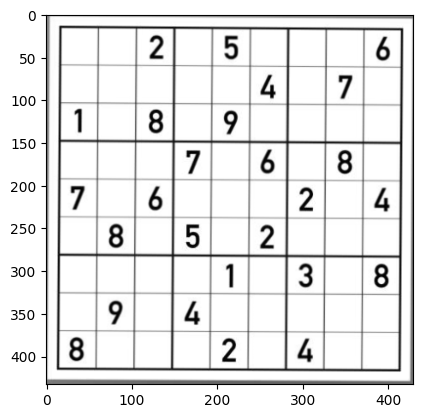

In [42]:
plt.imshow(warped,cmap='gray')

In [43]:
board=np.zeros([9,9],dtype='int')

In [44]:
stepX = warped.shape[1] // 9
stepY = warped.shape[0] // 9


In [24]:
board

array([[5, 4, 0, 0, 2, 0, 8, 0, 6],
       [0, 1, 9, 0, 0, 7, 0, 0, 3],
       [0, 0, 0, 3, 0, 0, 2, 1, 0],
       [3, 0, 0, 4, 0, 5, 0, 2, 0],
       [0, 0, 1, 0, 0, 0, 6, 0, 4],
       [6, 0, 4, 0, 3, 2, 0, 8, 0],
       [0, 6, 0, 0, 0, 0, 1, 9, 0],
       [4, 0, 2, 0, 0, 9, 0, 0, 5],
       [0, 5, 0, 0, 7, 0, 6, 0, 2]])

In [25]:
inference_sudoku(board)

1/1 [==============================] - 0s 39ms/step


array([[5, 4, 3, 9, 2, 1, 8, 7, 6],
       [2, 1, 9, 5, 5, 7, 4, 5, 3],
       [7, 7, 6, 3, 9, 4, 2, 1, 9],
       [3, 8, 8, 4, 6, 5, 9, 2, 1],
       [2, 2, 1, 7, 8, 8, 6, 3, 4],
       [6, 7, 4, 7, 3, 2, 5, 8, 1],
       [7, 6, 3, 2, 5, 3, 1, 9, 8],
       [4, 7, 2, 6, 6, 9, 7, 7, 5],
       [1, 5, 3, 1, 7, 3, 6, 4, 2]])

In [161]:
for (cellRow,boardRow) in zip(cellLocs,board):
    for (box,digit) in zip(cellRow,boardRow):
        startX,startY,endX,endY=box
        
        textX=int((endX-startX)*0.33)
        textY=int((endY-startY)*-0.2)
        textX+=startX
        textY+=endY
        
        cv2.putText(warped,str(digit),(textX,textY),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,255),2)
        

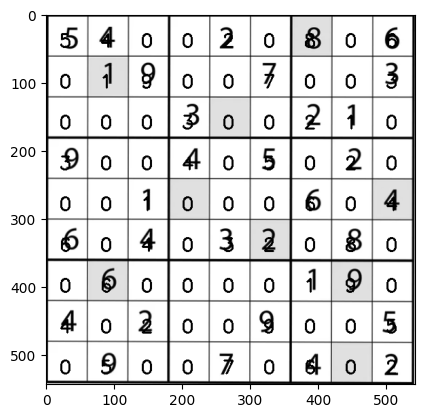

In [162]:
plt.imshow(warped,cmap='gray')
plt.show()